## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Importing Dataset

In [2]:
data = pd.read_csv('tcs_share_price.csv')

## Analyzing Dataset

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0


In [4]:
data.shape

(4722, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4722 non-null   object 
 1   Open       4706 non-null   float64
 2   High       4706 non-null   float64
 3   Low        4706 non-null   float64
 4   Close      4706 non-null   float64
 5   Adj Close  4706 non-null   float64
 6   Volume     4706 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.4+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0
...,...,...,...,...,...,...,...
4717,2021-07-26,3200.000000,3224.250000,3190.850098,3197.550049,3197.550049,1259611.0
4718,2021-07-27,3200.000000,3210.000000,3161.149902,3182.949951,3182.949951,1121367.0
4719,2021-07-28,3188.000000,3204.449951,3132.399902,3197.800049,3197.800049,1660654.0
4720,2021-07-29,3200.250000,3225.449951,3190.300049,3195.800049,3195.800049,1731997.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4722 non-null   datetime64[ns]
 1   Open       4706 non-null   float64       
 2   High       4706 non-null   float64       
 3   Low        4706 non-null   float64       
 4   Close      4706 non-null   float64       
 5   Adj Close  4706 non-null   float64       
 6   Volume     4706 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 258.4 KB


In [8]:
data = data.dropna()

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0
...,...,...,...,...,...,...,...
4717,2021-07-26,3200.000000,3224.250000,3190.850098,3197.550049,3197.550049,1259611.0
4718,2021-07-27,3200.000000,3210.000000,3161.149902,3182.949951,3182.949951,1121367.0
4719,2021-07-28,3188.000000,3204.449951,3132.399902,3197.800049,3197.800049,1660654.0
4720,2021-07-29,3200.250000,3225.449951,3190.300049,3195.800049,3195.800049,1731997.0


In [10]:
import matplotlib.pyplot as plt

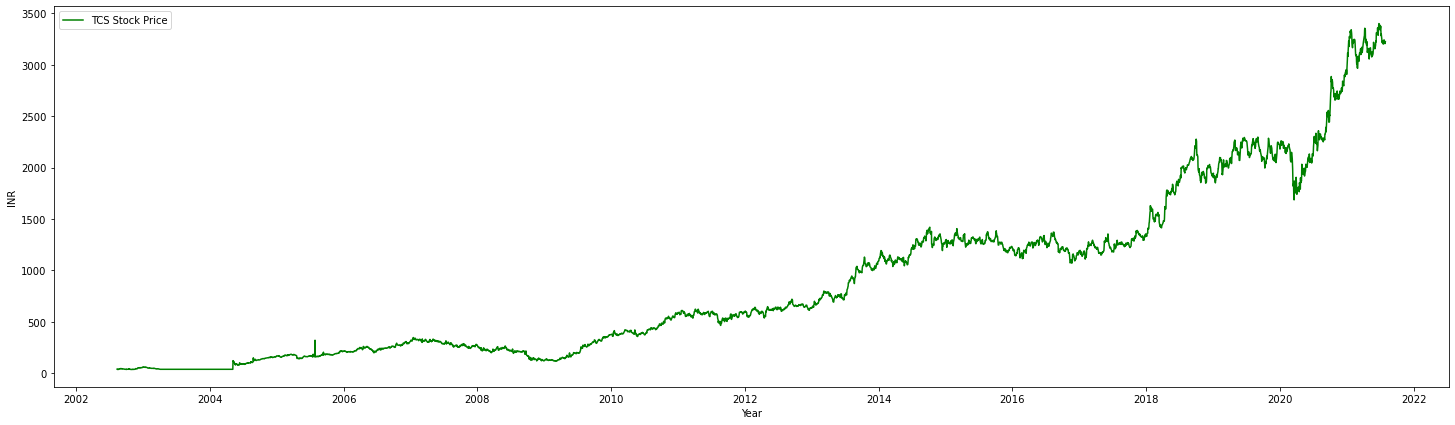

In [11]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date,data.High, color = 'green', label = 'TCS Stock Price')
plt.xlabel('Year')
plt.ylabel('INR')
plt.legend()
plt.show()

## Splitting Dataset

In [12]:
# 80% will be used for traning, and 20% for testing

train_size = 0.8        # 80%
split_index = int(train_size * data.shape[0])

factors_column = ['Open', 'High', 'Low', 'Close', 'Volume']
#y_col_index = 3 # Close

train_set = data[factors_column].values[:split_index]
test_set = data[factors_column].values[split_index:]

## Scaling Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

# scale our price from 0 to 1

scaler = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.fit_transform(test_set)

In [14]:
train_set_scaled[0]

array([0.00459044, 0.00256614, 0.00467806, 0.00312379, 0.00405498])

In [15]:
# this function will combine data of 60 days (we can change it using time_window parameter) 

def generate_data(series, y_col_index, time_window=60):
  X = []
  y = []
  for i in range(60, len(series)):
    X.append(series[i-time_window: i])
    y.append(series[i, y_col_index])
  return (np.array(X), np.array(y))

In [16]:
X_train, y_train = generate_data(train_set_scaled, y_col_index=3)
X_test, y_test = generate_data(test_set_scaled, y_col_index=3)

In [17]:
print('Training data shape: ',X_train.shape)
print('We will observe {} days price to predict next day price'.format(X_train.shape[1]))

Training data shape:  (3704, 60, 5)
We will observe 60 days price to predict next day price


## Creating LSTM Network

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
model = Sequential()

# layer 1
#return_sequence=True, it will return something with shape
#unit means the dimension of the inner cells in LSTM.

model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 5))
model.add(Dropout(0.2))

# layer 5
model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            9720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 10)            1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 3

## Training Model

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,
          y_train,
          epochs = 50,
          batch_size = 64,
          validation_data = (X_test, y_test))

Epoch 1/50
58/58 [==============================] - 7s 60ms/step - loss: 0.0252 - val_loss: 0.0032
Epoch 2/50
58/58 [==============================] - 3s 48ms/step - loss: 0.0139 - val_loss: 0.0030
Epoch 3/50
58/58 [==============================] - 3s 46ms/step - loss: 0.0117 - val_loss: 0.0038
Epoch 4/50
58/58 [==============================] - 3s 46ms/step - loss: 0.0110 - val_loss: 0.0045
Epoch 5/50
58/58 [==============================] - 3s 46ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 6/50
58/58 [==============================] - 3s 47ms/step - loss: 0.0097 - val_loss: 0.0036
Epoch 7/50
58/58 [==============================] - 3s 48ms/step - loss: 0.0096 - val_loss: 0.0062
Epoch 8/50
58/58 [==============================] - 3s 48ms/step - loss: 0.0087 - val_loss: 0.0024
Epoch 9/50
58/58 [==============================] - 3s 46ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 10/50
58/58 [==============================] - 3s 47ms/step - loss: 0.0082 - val_loss: 0.0025
Epoch 11/

## Making Predictions

In [22]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * scaler.data_range_[3]) + scaler.data_min_[3]

## Results

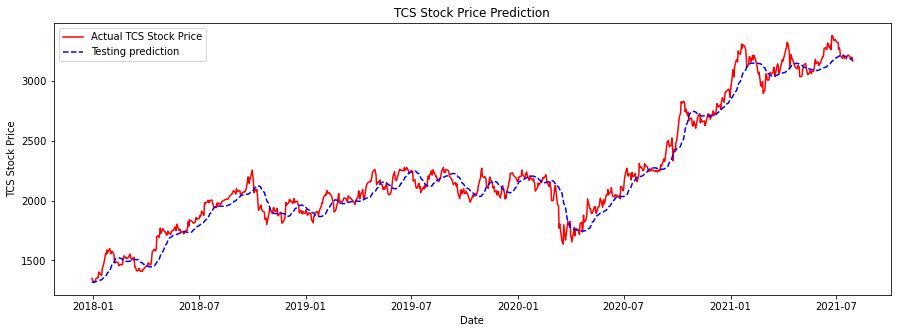

In [23]:
fig = plt.figure(figsize = (15, 5))
plt.plot(data.Date.values[ split_index+60 : ], data.Close.values[ split_index+60: ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

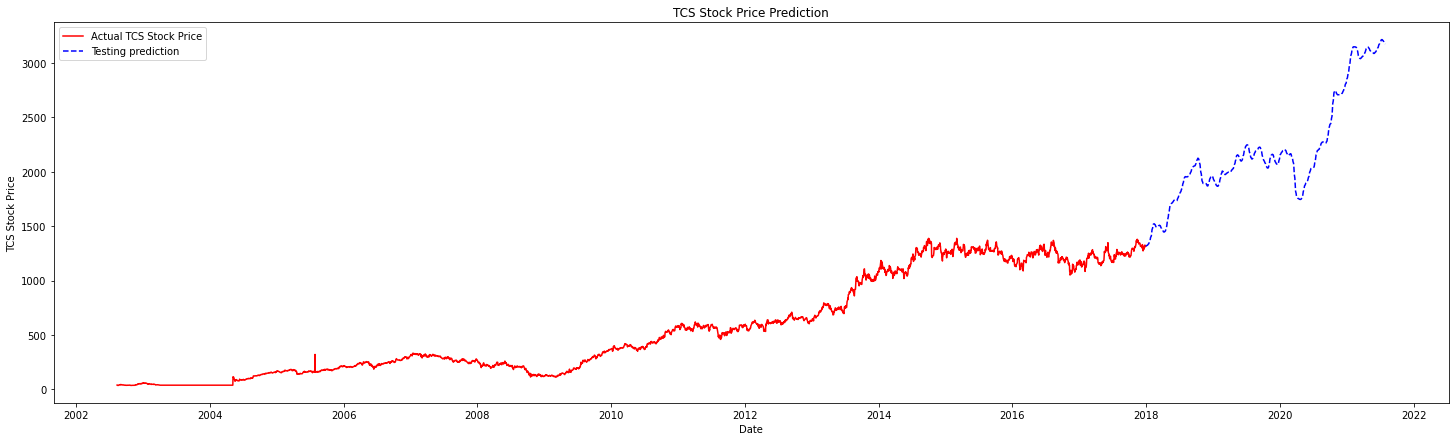

In [24]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+60 ], data.Close.values[ : split_index+60 ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

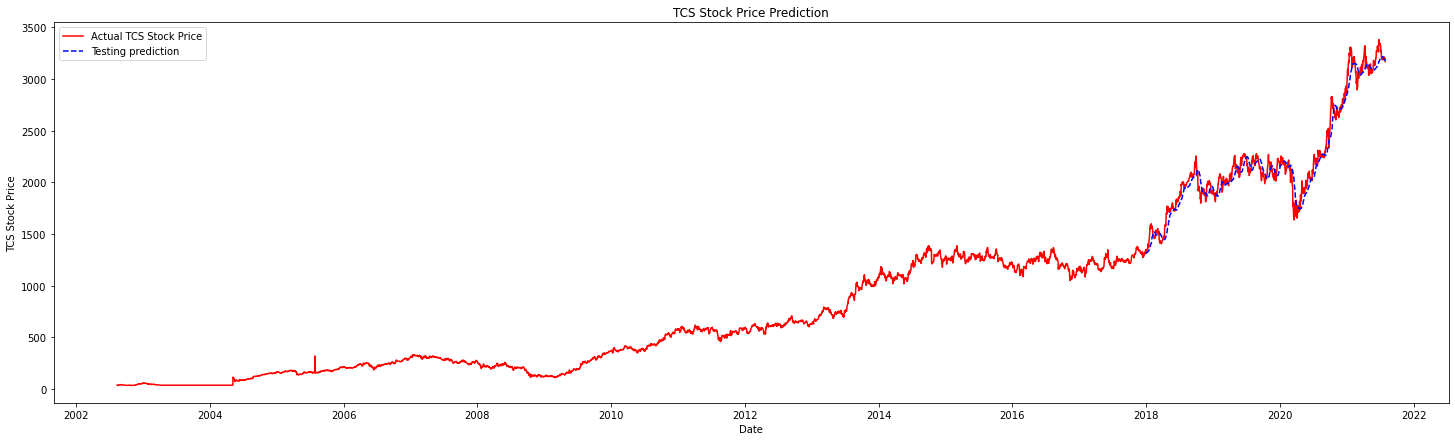

In [25]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date, data.Close, 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()